# Central Limit Theorem and Sampling Distributions

- The Central Limit Theorem states that the sampling distribution of the sampling means approaches a normal distribution as the sample size gets larger, no matter what the shape of the population distribution
- The more samples, and the larger the samples, the more the graph of the sample means will look like a normal distribution
-  Average of sample means will be the population mean. If all of the samples means are added up, the average will be the actual population mean
- The sample standard deviation will always go down (Larger the sample size, lower the SD)
    - Theoretical SD of Sample Mean: sigma/sqrt(n)

### All possible samples
- n = count of population
- r = sample size
- C = n! / r!(n-r)!

#### Example: 6 objects
- r1 = 6! / 1!5! = 6
- r2 = 6! / 2!4! = 15
- r3 = 6! / 3!3!= 20
- r4 = 6! / 4!2! = 15
- r5 = 6! / 5!1! = 6
- r6 = 6! / 6!0! = 1

## Example: Student IQ
- Mean = 100
- SD = 15
- Normally Distributed

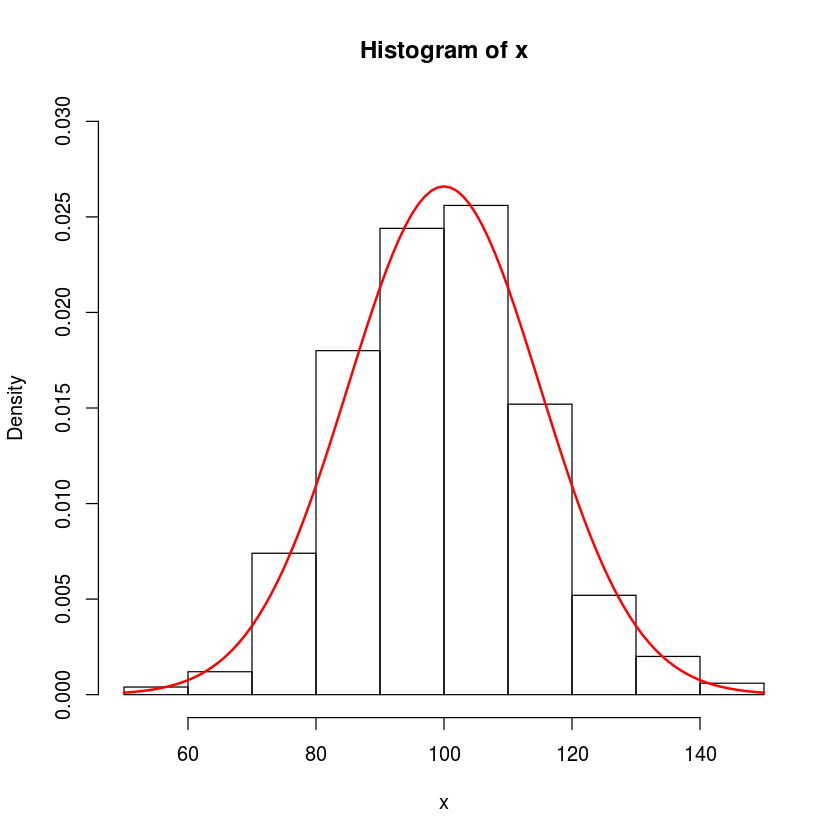

In [1]:
x <- rnorm(500, mean=100, sd=15)
hist(x, prob=TRUE, ylim=c(0,0.03)) #ylim=c(0,0.03): y-axis to 0 - 0.03
curve(dnorm(x, mean=100, sd=15), 50, 150, add=TRUE, lwd=2, col="red") #adds a normal distribution curve
#x-axis: 50-150 (optional)
#lwd=2, specifies thickness

In [2]:
mean(x)

[1] 99.4618

- Mean close to 100

### Sample size = 9.  Compute Mean of  sample (xbar)

In [3]:
x <- rnorm(9, mean=100, sd=15)
mean(x)

[1] 103.1593

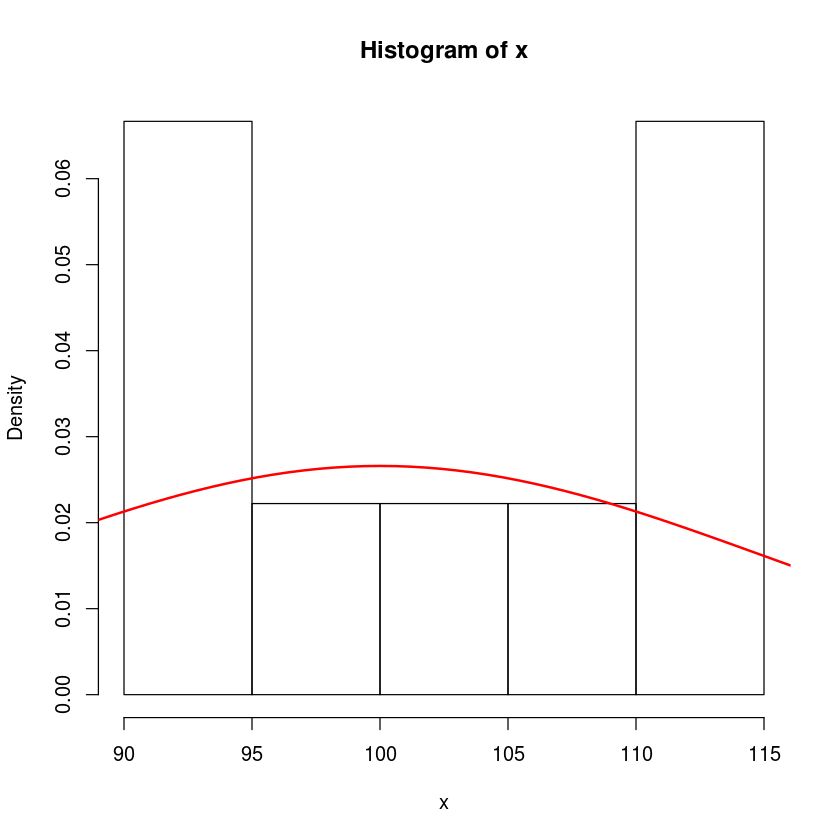

In [4]:
hist(x, prob=TRUE) 
curve(dnorm(x, mean=100, sd=15), 70, 130, add=TRUE, lwd=2, col="red") 

## Build Sampling Distribution:
- Sample size = 9
- Number of samples = 20
- Mean = 100
- Sigma (SD) = 15

In [19]:
mu <- 100
sigma <- 15
n <- 9

#### Create empty vector of zeros, with 9 elements containing zeros

In [20]:
xbar <- rep(0, 20)
xbar

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

#### Use a loop to take Mean of 20 samples from the parent population (insert each into a new vector xbar)
- Sample Size = 9

In [21]:
for (i in 1:20){
    xbar[i] <- mean(rnorm(n, mean=mu, sd=sigma))
}

In [22]:
xbar

[1]  98.38579 100.26480 102.43288  98.41113  96.68410 102.93316 102.08695
 [8] 102.83930 113.65267 106.22387 101.35516 108.18876  99.89440  99.44451
[15]  96.76176  99.00625 100.40166  93.60259  96.75718 104.85704

#### Compute mean of xbar

In [23]:
mean(xbar)

[1] 101.2092

- Mean of Means is very close to the actual Mean (100)

#### Plot in histogram 

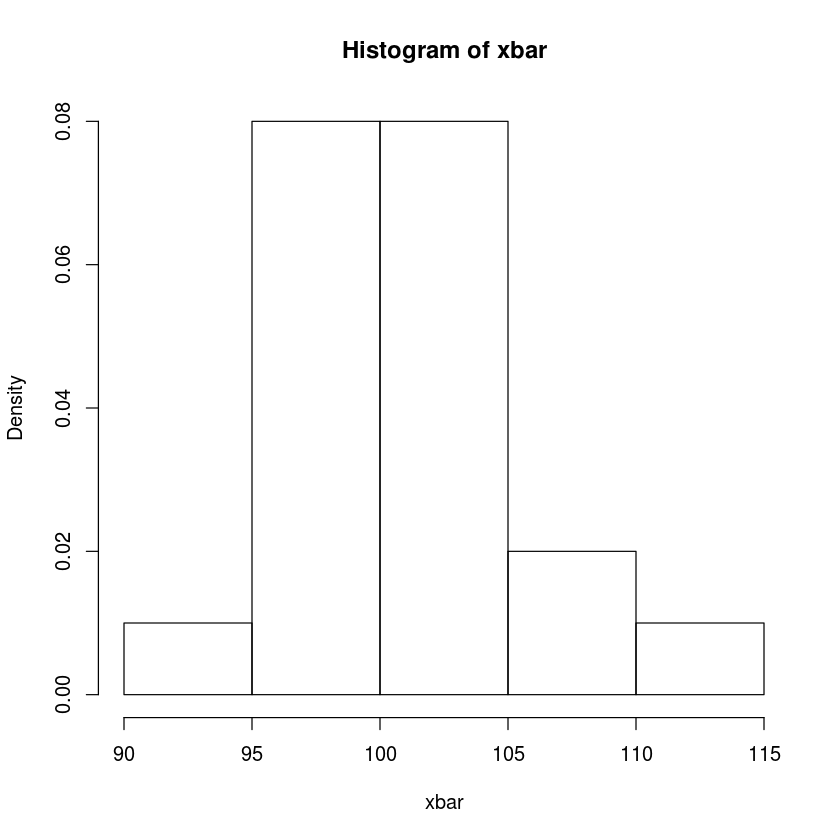

In [26]:
hist(xbar, prob=TRUE) 

### Compare with 10,000 samples
- Sample size = 9

In [27]:
xbar <- rep(0, 10000)
for (i in 1:10000){
    xbar[i] <- mean(rnorm(n, mean=mu, sd=sigma))
}

In [28]:
mean(xbar)

[1] 100.0339

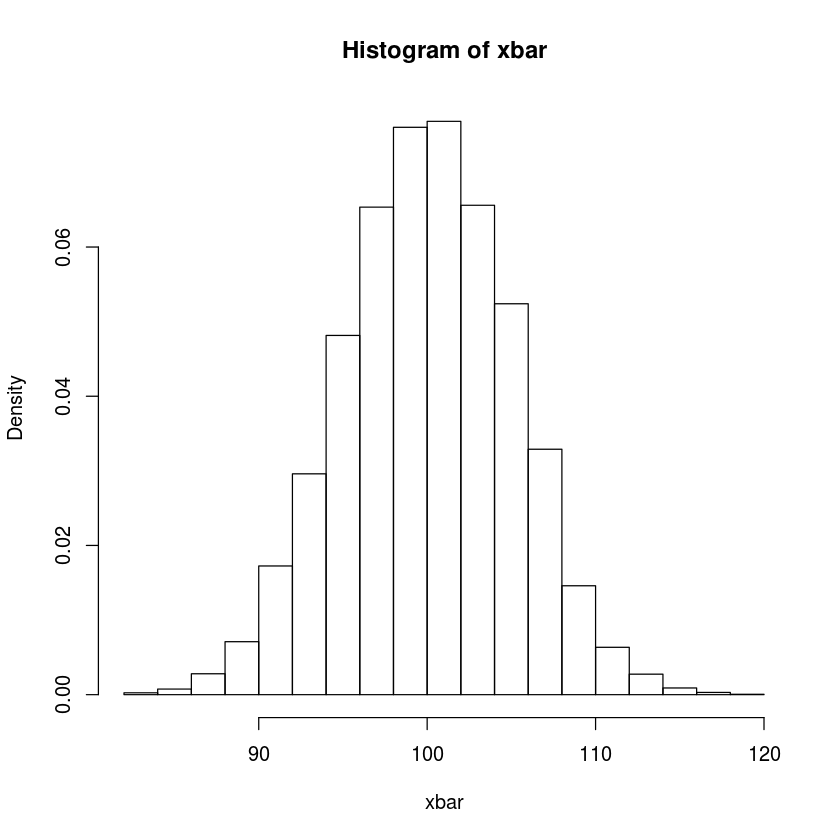

In [29]:
hist(xbar, prob=TRUE) 

### Standard Deviation of the Sampling Distributiion is SD of population / sqrt(Sample Size): sd/sqrt(n)
- SD of Sampling Distribution will decrease with increase in Sample Size

In [30]:
sd(xbar)

[1] 4.994791

In [31]:
sigma/sqrt(9)

[1] 5

<hr>

# Central Limit Theorem when population is Not Normally Distributed

### Example: Uniform Distribution
- Random numbers between 0 and 10 uniformly distributed
- Mean of the population = 5
- Standard Deviation = 2.889
- Sample Size = 5
- Sample Count = 20

In [45]:
min <- 0
max <- 10
n <- 5

In [46]:
xbar <- rep(0, 20)
for (i in 1:20){
    xbar[i] <- mean(runif(n, min=min, max=max))
}

In [47]:
xbar

[1] 4.395466 6.724830 5.946672 5.070467 5.085035 5.278298 3.317254 3.317313
 [9] 4.220926 5.369180 4.138283 4.387595 5.489735 3.851581 4.532895 4.355523
[17] 7.441423 4.207838 7.051663 8.287045

### Mean of Means from Uniform Distribution is close to Population Mean

In [42]:
mean(xbar)

[1] 5.436158

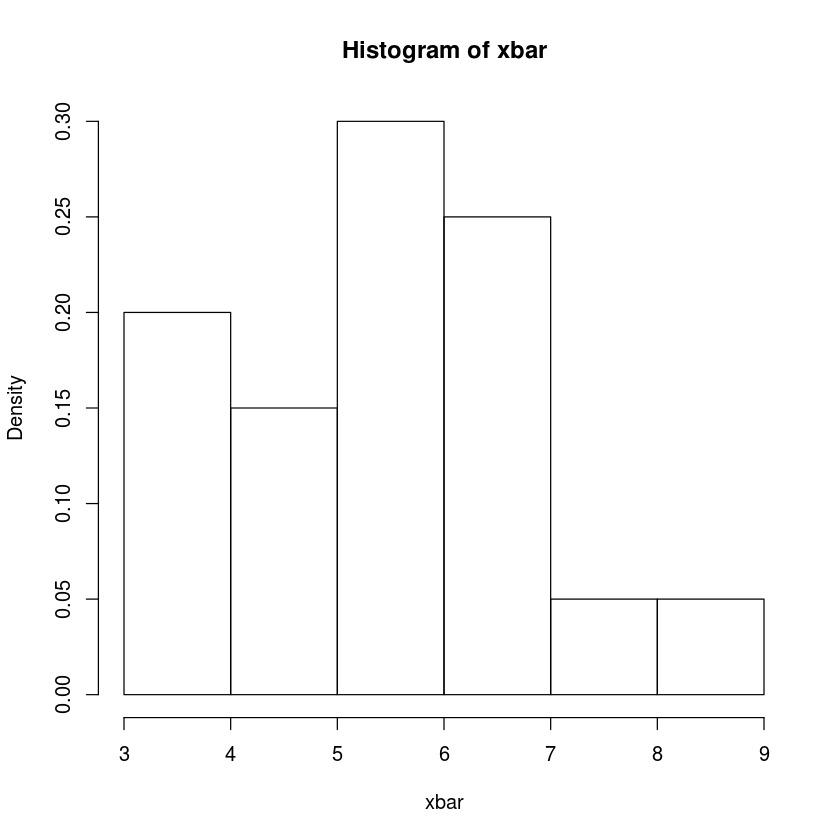

In [43]:
hist(xbar, prob=TRUE) 

### Comapre with 10,000 Sample count:

In [48]:
xbar <- rep(0, 10000)
for (i in 1:10000){
    xbar[i] <- mean(runif(n, min=min, max=max))
}

In [49]:
mean(xbar)

[1] 4.985793

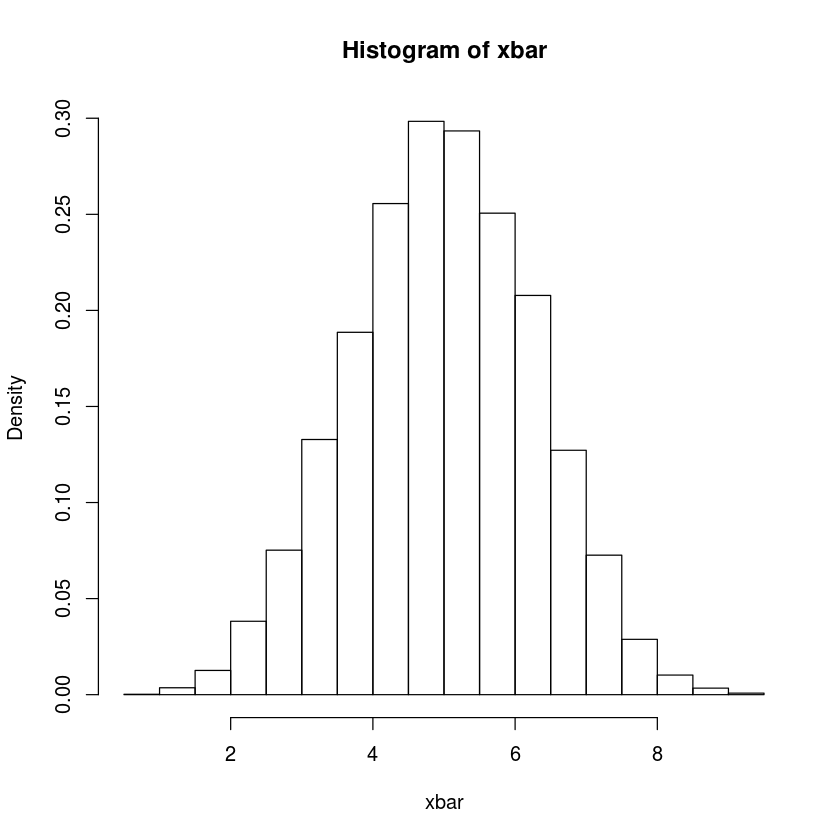

In [54]:
hist(xbar, prob=TRUE) 

### Standard Deviation of the Sampling Distributiion is SD of population / sqrt(Sample Size): sd/sqrt(n)
- SD of Sampling Distribution will decrease with increase in Sample Size

In [55]:
sd(xbar)

[1] 1.283693

In [58]:
2.889/sqrt(5)

[1] 1.292

<hr>

# Regardless of the shape of the underlying population, the sampling distribution of xbar becomes approximately normal as the sample size n, increases.

## Conditions:
- Independence: The sample values must be independent of each other
- Random: The data values must be sampled randomly
- 10% Condition: Sample size should be less than 10% of the population
- Large Sample Size: Sample size should be large enough